In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Malicious Macro Detection
%ls

/content/drive/MyDrive/Colab Notebooks/Malicious Macro Detection
AdaBoostClassifier.joblib          svmClassifier.joblib    word2vec_model.joblib
classifiers_recall_scores.joblib   test_dataset.csv        word2vec_model.pkl
CNNClassifier.joblib               test_loader.joblib      x_test_1000.joblib
DecisionTreeClassifier.joblib      test_loader.pkl         x_test_100.joblib
features_k_1000.joblib             tfidf_1000.joblib       x_test_10.joblib
features_k_100.joblib              tfidf_100.joblib        x_test_1200.joblib
features_k_10.joblib               tfidf_10.joblib         x_test_1500.joblib
features_k_1200.joblib             tfidf_1200.joblib       x_test_2000.joblib
features_k_1500.joblib             tfidf_1500.joblib       x_test_2500.joblib
features_k_2000.joblib             tfidf_2000.joblib       x_test_3000.joblib
features_k_2500.joblib             tfidf_2500.joblib       x_test_500.joblib
features_k_3000.joblib             tfidf_3000.joblib       x_test_50.joblib
fe

In [ ]:
import os
import joblib
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_set = pd.read_csv('train_dataset.csv', encoding='utf-16le')
val_set = pd.read_csv('validation_dataset.csv', encoding='utf-16le')
test_set = pd.read_csv('test_dataset.csv', encoding='utf-16le')

In [ ]:
mapper = {
    'white' : 1,
    'mal' : 0
}

x_train, y_train = train_set['vba_code'], train_set['label']
x_val, y_val = val_set['vba_code'], val_set['label']
x_test, y_test = test_set['vba_code'], test_set['label']

y_train = y_train.map(mapper)
y_val = y_val.map(mapper)
y_test = y_test.map(mapper)

In [ ]:
classifiers_paths = {
    'AdaBoost' : 'AdaBoostClassifier.joblib',
    'Decision Tree' : 'DecisionTreeClassifier.joblib',
    'Gradient Boosting' : 'GradientBoostingClassifier.joblib',
    'KNN' : 'knnClassifier.joblib',
    'MLP' : 'mlpClasifier.joblib',
    'Random Forest' : 'randomForestClassifier.joblib',
    'SVM' : 'svmClassifier.joblib',
    'Gradient Boosting' : 'GradientBoostingClassifier.joblib',
}

classifiers = {}

for name, path in classifiers_paths.items():
    if name in ['KNN', 'MLP']:
        clf = joblib.load(path).steps[-1][-1]
    else:
        clf = joblib.load(path)
    classifiers[name] = clf

In [ ]:
k_features = [10, 50, 100, 500, 1000, 1200, 1500, 2000, 2500, 3000]

for k in k_features:
    print(f'K = {k}')
    tfidf = TfidfVectorizer(max_features=k)
    X_train_tfidf = tfidf.fit_transform(x_train)
    X_test_tfidf = tfidf.transform(x_test)
    features_name = tfidf.get_feature_names_out()
    print(features_name)
    save_path = f'features_k_{k}.joblib'
    try:
      joblib.dump(features_name ,save_path)
      joblib.dump(X_train_tfidf, f'x_train_{k}.joblib')
      joblib.dump(X_test_tfidf, f'x_test_{k}.joblib')
      joblib.dump(tfidf, f'tfidf_{k}.joblib')
      print(f'{k} features saved')
    except Exception as e:
      print('features not saved')
      print(e)
    print()

K = 10
['activesheet' 'as' 'boq' 'cells' 'end' 'if' 'private' 'sub' 'then'
 'value']
10 features saved

K = 50
['13' '99' 'activesheet' 'and' 'application' 'as' 'attribute' 'boq' 'by'
 'byval' 'call' 'cells' 'dim' 'elseif' 'end' 'explicit' 'false' 'for'
 'function' 'if' 'integer' 'is' 'long' 'macro' 'macro4' 'msgbox' 'of' 'on'
 'option' 'please' 'private' 'public' 'range' 'select' 'selection' 'set'
 'sheet' 'sheetcount' 'sheets' 'string' 'sub' 'the' 'then' 'this' 'to'
 'true' 'updated' 'value' 'with' 'words']
50 features saved

K = 100
['01' '05' '09' '100' '13' '2011' '99' '9999' 'activesheet' 'activewindow'
 'agrawal' 'and' 'any' 'application' 'as' 'attribute' 'beep' 'boolean'
 'boq' 'boq_ver2' 'by' 'byval' 'call' 'case' 'cells' 'charteredvaluer'
 'com' 'const' 'count' 'crores' 'dim' 'double' 'download' 'downloads'
 'else' 'elseif' 'end' 'error' 'exit' 'explicit' 'false' 'for' 'free'
 'from' 'function' 'goto' 'if' 'in' 'integer' 'invalid' 'is' 'issues'
 'itemratecheck' 'lastrow' 'lon

In [ ]:
datasets_paths = {
    'k_10' : ('x_train_10.joblib', 'x_test_10.joblib'),
    'k_50' : ('x_train_50.joblib', 'x_test_50.joblib'),
    'k_100' : ('x_train_100.joblib', 'x_test_100.joblib'),
    'k_500' : ('x_train_500.joblib', 'x_test_500.joblib'),
    'k_1000' : ('x_train_1000.joblib', 'x_test_1000.joblib'),
    'k_1200' : ('x_train_1200.joblib', 'x_test_1200.joblib'),
    'k_1500' : ('x_train_1500.joblib', 'x_test_1500.joblib'),
    'k_2000' : ('x_train_2000.joblib', 'x_test_2000.joblib'),
    'k_2500' : ('x_train_2500.joblib', 'x_test_2500.joblib'),
    'k_3000' : ('x_train_3000.joblib', 'x_test_3000.joblib'),
}

all_k_datasets = {name : (joblib.load(paths[0]), joblib.load(paths[1])) for name, paths in datasets_paths.items()} # load datasets from cloud

In [10]:
recall_scores = {name: [] for name in classifiers.keys()}

for k in k_features:
    print(f'K = {k}')
    tfidf = TfidfVectorizer(max_features=k)
    X_train_tfidf = tfidf.fit_transform(x_train)
    X_test_tfidf = tfidf.transform(x_test)

    for name, clf in classifiers.items():
      print(name)
      clf.fit(X_train_tfidf, y_train)
      y_pred = clf.predict(X_test_tfidf)
      recall = recall_score(y_test, y_pred)
      recall_scores[name].append(recall)

    print()
    joblib.dump(recall_scores, 'recall_scores.joblib') # save for each k, for when runtime crushs

recall_scores


K = 10
AdaBoost
Decision Tree
Gradient Boosting
KNN
MLP
Random Forest
SVM

K = 50
AdaBoost
Decision Tree
Gradient Boosting
KNN
MLP
Random Forest
SVM

K = 100
AdaBoost
Decision Tree
Gradient Boosting
KNN
MLP
Random Forest
SVM

K = 500
AdaBoost
Decision Tree
Gradient Boosting
KNN
MLP
Random Forest
SVM

K = 1000
AdaBoost
Decision Tree
Gradient Boosting
KNN
MLP
Random Forest
SVM

K = 1200
AdaBoost
Decision Tree
Gradient Boosting
KNN
MLP
Random Forest
SVM

K = 1500
AdaBoost
Decision Tree
Gradient Boosting
KNN
MLP
Random Forest
SVM

K = 2000
AdaBoost
Decision Tree
Gradient Boosting
KNN
MLP
Random Forest
SVM

K = 2500
AdaBoost
Decision Tree
Gradient Boosting
KNN
MLP
Random Forest
SVM

K = 3000
AdaBoost
Decision Tree
Gradient Boosting
KNN
MLP
Random Forest
SVM



{'AdaBoost': [0.9998120300751879,
  0.9998120300751879,
  0.9998120300751879,
  1.0,
  0.9990601503759399,
  0.9990601503759399,
  0.9990601503759399,
  0.9990601503759399,
  0.9992481203007518,
  0.9992481203007518],
 'Decision Tree': [0.9680451127819549,
  0.9904135338345864,
  0.9906015037593985,
  0.993421052631579,
  0.993796992481203,
  0.9947368421052631,
  0.9943609022556391,
  0.9926691729323308,
  0.993421052631579,
  0.9943609022556391],
 'Gradient Boosting': [0.9796992481203007,
  0.9932330827067669,
  0.9949248120300752,
  0.9954887218045113,
  0.9977443609022556,
  0.9968045112781955,
  0.9975563909774436,
  0.9975563909774436,
  0.9979323308270677,
  0.9973684210526316],
 'KNN': [0.9614661654135338,
  0.9821428571428571,
  0.9834586466165414,
  0.9842105263157894,
  0.9821428571428571,
  0.9834586466165414,
  0.9840225563909775,
  0.9828947368421053,
  0.9840225563909775,
  0.9836466165413534],
 'MLP': [0.9605263157894737,
  0.9932330827067669,
  0.993421052631579,
  0.9

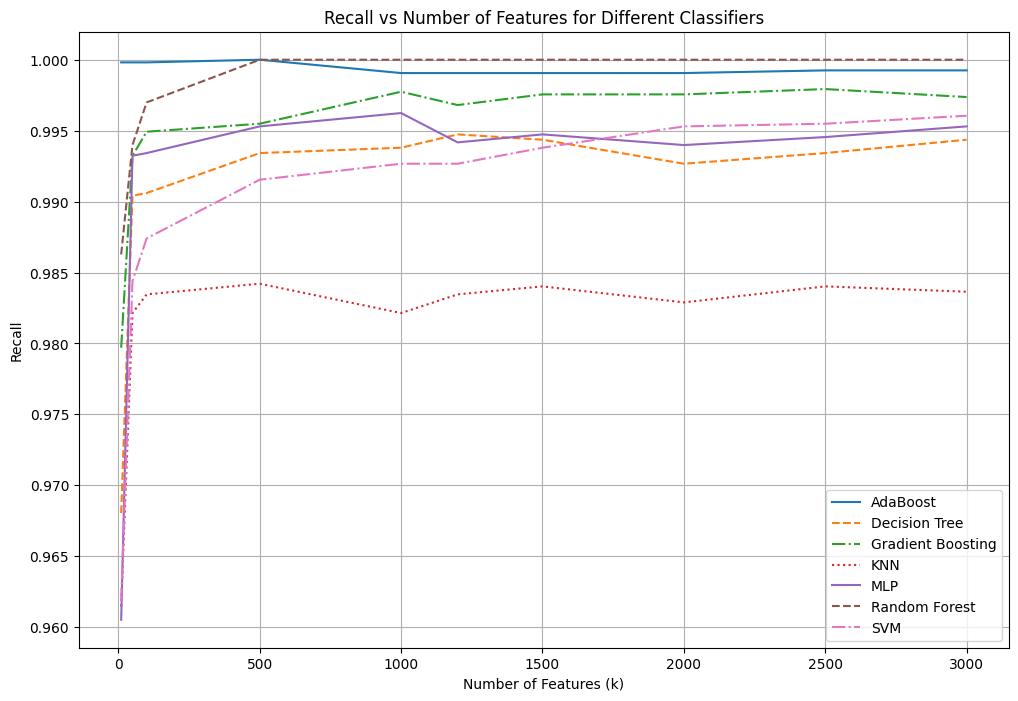

In [11]:
line_styles = ['-', '--', '-.', ':', '-', '--', '-.']
plt.figure(figsize=(12, 8))

for (name, scores), line_style in zip(recall_scores.items(), line_styles):
    plt.plot(k_features, scores, label=name, linestyle=line_style)

plt.xlabel('Number of Features (k)')
plt.ylabel('Recall')
plt.title('Recall vs Number of Features for Different Classifiers')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
for idx, k in enumerate(k_features):
  max_recall = 0
  model_name = ""
  for name, scores in recall_scores.items():
    if scores[idx] > max_recall:
      max_recall = scores[idx]
      model_name = name
  print(f'For k = {k}, the maximal recall value is {max_recall} achieved by {model_name}')


For k = 10, the maximal recall value is 0.9998120300751879 achieved by AdaBoost
For k = 50, the maximal recall value is 0.9998120300751879 achieved by AdaBoost
For k = 100, the maximal recall value is 0.9998120300751879 achieved by AdaBoost
For k = 500, the maximal recall value is 1.0 achieved by AdaBoost
For k = 1000, the maximal recall value is 1.0 achieved by Random Forest
For k = 1200, the maximal recall value is 1.0 achieved by Random Forest
For k = 1500, the maximal recall value is 1.0 achieved by Random Forest
For k = 2000, the maximal recall value is 1.0 achieved by Random Forest
For k = 2500, the maximal recall value is 1.0 achieved by Random Forest
For k = 3000, the maximal recall value is 1.0 achieved by Random Forest
